In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Applied displacements and computed reactions
total = 213
start = 5
end = 106
skipfooter = total-end
data_disp = pd.read_csv("./forma08a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 112
end = 213
skipfooter = total-end
data_force = pd.read_csv("./forma08a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

print(data_disp)
print(data_force)

         INTITULE NOEUD    RESU NOM_CHAM  NUME_ORDRE  INST  ABSC_CURV  COOR_X  \
0    disp_control    N2  result     DEPL           0   0.0        0.0     0.0   
1    disp_control    N2  result     DEPL           1   0.1        0.0     0.0   
2    disp_control    N2  result     DEPL           2   0.2        0.0     0.0   
3    disp_control    N2  result     DEPL           3   0.3        0.0     0.0   
4    disp_control    N2  result     DEPL           4   0.4        0.0     0.0   
..            ...   ...     ...      ...         ...   ...        ...     ...   
96   disp_control    N2  result     DEPL          96   9.6        0.0     0.0   
97   disp_control    N2  result     DEPL          97   9.7        0.0     0.0   
98   disp_control    N2  result     DEPL          98   9.8        0.0     0.0   
99   disp_control    N2  result     DEPL          99   9.9        0.0     0.0   
100  disp_control    N2  result     DEPL         100  10.0        0.0     0.0   

     COOR_Y  COOR_Z        

In [20]:
# Applied displacements and computed reactions
total = 213
start = 5
end = 106
skipfooter = total-end
data_disp_a = pd.read_csv("./forma08a_alt.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 112
end = 213
skipfooter = total-end
data_force_a = pd.read_csv("./forma08a_alt.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

print(data_disp_a)
print(data_force_a)

         INTITULE NOEUD    RESU NOM_CHAM  NUME_ORDRE  INST  ABSC_CURV  COOR_X  \
0    disp_control    N2  result     DEPL           0   0.0        0.0     0.0   
1    disp_control    N2  result     DEPL           1   0.1        0.0     0.0   
2    disp_control    N2  result     DEPL           2   0.2        0.0     0.0   
3    disp_control    N2  result     DEPL           3   0.3        0.0     0.0   
4    disp_control    N2  result     DEPL           4   0.4        0.0     0.0   
..            ...   ...     ...      ...         ...   ...        ...     ...   
96   disp_control    N2  result     DEPL          96   9.6        0.0     0.0   
97   disp_control    N2  result     DEPL          97   9.7        0.0     0.0   
98   disp_control    N2  result     DEPL          98   9.8        0.0     0.0   
99   disp_control    N2  result     DEPL          99   9.9        0.0     0.0   
100  disp_control    N2  result     DEPL         100  10.0        0.0     0.0   

     COOR_Y  COOR_Z        

In [10]:
# Reference solution
E = 100
Gc = 0.9
b = 6
h = 2
I = b * h * h * h / 12.0

U = data_disp["DY"][1:100]
F = list(map(lambda u: (E*I)**(1/4) * (2*b*Gc)**(3/4) / (3*u)**(1/2), U))
print(F)

[48.61914504976, 34.38751660959043, 28.079628658768932, 24.318684719433815, 21.751836534643783, 19.856950117706145, 18.384182365486904, 17.196981461671687, 16.213582191747975, 15.381640072034399, 14.665878361424264, 14.04155736739562, 13.490730859443138, 13.000025680802622, 12.559244901009729, 12.160497384628757, 11.797432684045564, 11.465058730200326, 11.159281774583643, 10.87673389798171, 10.614615513240231, 10.370577719763748, 10.142633115837457, 9.929087275531712, 9.728504916495199, 9.539589061038662, 9.36126792829994, 9.192586873331532, 9.032707494126546, 8.880890044127963, 8.736478991389514, 8.598891079982447, 8.467605396868468, 8.342155057891237, 8.22213195562524, 8.107133369678955, 7.99682889660591, 7.890907640023168, 7.789086787752573, 7.691108432035286, 7.596736818988731, 7.505755960465712, 7.417967553204141, 7.333189159605377, 7.251260668986652, 7.172010405124264, 7.095303026470578, 7.021005390320969, 6.9489939136188985, 6.87915370818889, 6.8113778096976, 6.745566488569038, 

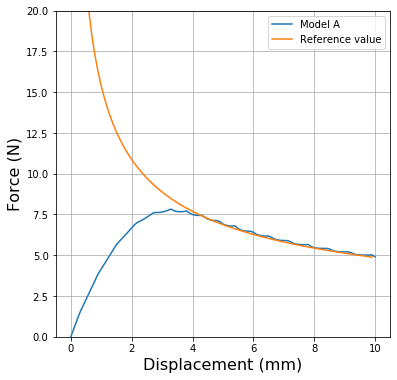

In [15]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(np.array(data_disp["DY"]), np.array(data_force["DY"]), 'C0-', label='Model A')
plt.plot(np.array(U), np.array(F), 'C1-', label='Reference value')
plt.xlabel('Displacement (mm)', fontsize=16)
plt.ylabel('Force (N)', fontsize=16)
plt.grid(True)
ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma08a_8.svg')

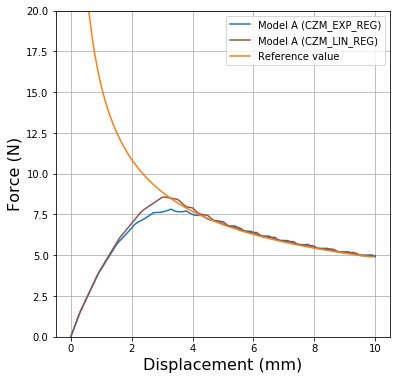

In [22]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(np.array(data_disp["DY"]), np.array(data_force["DY"]), 'C0-', label='Model A (CZM_EXP_REG)')
plt.plot(np.array(data_disp_a["DY"]), np.array(data_force_a["DY"]), 'C5-', label='Model A (CZM_LIN_REG)')
plt.plot(np.array(U), np.array(F), 'C1-', label='Reference value')
plt.xlabel('Displacement (mm)', fontsize=16)
plt.ylabel('Force (N)', fontsize=16)
plt.grid(True)
ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma08a_alt_8.svg')

In [16]:
# Applied displacements and computed reactions
total = 103
start = 5
end = 51
skipfooter = total-end
data_disp_b = pd.read_csv("./forma08b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 57
end = 103
skipfooter = total-end
data_force_b = pd.read_csv("./forma08b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

print(data_disp_b)
print(data_force_b)

        INTITULE NOEUD    RESU NOM_CHAM  NUME_ORDRE  INST  ABSC_CURV  COOR_X  \
0   disp_control    N2  result     DEPL           0   0.0        0.0     0.0   
1   disp_control    N2  result     DEPL           1   0.1        0.0     0.0   
2   disp_control    N2  result     DEPL           2   0.2        0.0     0.0   
3   disp_control    N2  result     DEPL           3   0.3        0.0     0.0   
4   disp_control    N2  result     DEPL           4   0.4        0.0     0.0   
5   disp_control    N2  result     DEPL           5   0.5        0.0     0.0   
6   disp_control    N2  result     DEPL           6   0.6        0.0     0.0   
7   disp_control    N2  result     DEPL           7   0.7        0.0     0.0   
8   disp_control    N2  result     DEPL           8   0.8        0.0     0.0   
9   disp_control    N2  result     DEPL           9   0.9        0.0     0.0   
10  disp_control    N2  result     DEPL          10   1.0        0.0     0.0   
11  disp_control    N2  result     DEPL 

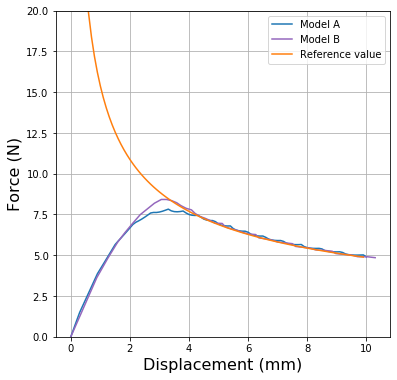

In [19]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(np.array(data_disp["DY"]), np.array(data_force["DY"]), 'C0-', label='Model A')
plt.plot(np.array(data_disp_b["DY"]), np.array(data_force_b["DY"]), 'C4-', label='Model B')
plt.plot(np.array(U), np.array(F), 'C1-', label='Reference value')
plt.xlabel('Displacement (mm)', fontsize=16)
plt.ylabel('Force (N)', fontsize=16)
plt.grid(True)
ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma08b_8.svg')